# BUILD DATASET
## ML HW2 Gioele Migno 1795826 



In [1]:
#folders
PWD = '.'

DATASET_SRC='dataset_SRC'

DST_ROOT = 'dataset'
TRAINING_SET_DST = 'training'
VALIDATION_SET_DST = 'validation'
TEST_SET_DST = 'test'

In [2]:
#parameters

#percentage_split
TRAIN_PERC = 0.80
VALIDATION_PERC = 0.10
TEST_PERC = 0.10

SEED_RANDOM = 20201205

In [3]:
import os
from sklearn.utils import shuffle
from shutil import copyfile

In [4]:
src_dataset = os.path.join(PWD, DATASET_SRC)

train = os.path.join(PWD, DST_ROOT, TRAINING_SET_DST)
val = os.path.join(PWD, DST_ROOT, VALIDATION_SET_DST)
test = os.path.join(PWD, DST_ROOT, TEST_SET_DST)

if not os.path.isdir(src_dataset):
  print(src_dataset)
  raise KeyboardInterrupt

if not os.path.isdir(train):
  os.makedirs(train)

if not os.path.isdir(val):
  os.makedirs(val)

if not os.path.isdir(test):
  os.makedirs(test)

In [5]:
def split_folder(path_src, train_dst, val_dst, test_dst, train_perc, val_perc, test_perc):
  if not os.path.isdir(path_src):
    print(src_dataset)
    raise KeyboardInterrupt
  
  files = os.listdir(path_src)
  num_files = len(files)

  idxs = range(num_files)
  idxs_shuffle = shuffle(idxs, random_state=SEED_RANDOM)  #shuffle of sample before the split

  train_idxs = idxs_shuffle[ : int(train_perc*num_files)]
  test_idxs = idxs_shuffle[len(train_idxs) :  int(len(train_idxs)+ test_perc*num_files)]
  val_idxs = idxs_shuffle[len(train_idxs)+len(test_idxs) : ]

  for i in train_idxs:
    file_path_src = os.path.join(path_src, files[i])
    file_path_dst = os.path.join(train_dst, files[i])
    copyfile(file_path_src, file_path_dst)

  for i in val_idxs:
    file_path_src = os.path.join(path_src, files[i])
    file_path_dst = os.path.join(val_dst, files[i])
    copyfile(file_path_src, file_path_dst)

  for i in test_idxs:
    file_path_src = os.path.join(path_src, files[i])
    file_path_dst = os.path.join(test_dst, files[i])
    copyfile(file_path_src, file_path_dst)

In [6]:
for classe in os.listdir(src_dataset):
  folder_src=os.path.join(src_dataset,classe)
  #print(folder_src)

  _train_dst = os.path.join(train, classe)
  _val_dst = os.path.join(val, classe)
  _test_dst = os.path.join(test, classe)

  if not os.path.isdir(_train_dst):
    os.mkdir(_train_dst)
  if not os.path.isdir(_val_dst):
    os.mkdir(_val_dst)
  if not os.path.isdir(_test_dst):
    os.mkdir(_test_dst)

  split_folder(folder_src, _train_dst, _val_dst, _test_dst, TRAIN_PERC, VALIDATION_PERC, TEST_PERC)
  

# ANALYSIS DISTRIBUTION CLASSES

In [7]:
# source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
def plt_pie_chart(title, data, labels, name_file_out=None):
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

    new_label = labels
    sum_data = sum(data)
    for i in range(0,len(new_label)):
        new_label[i] = new_label[i] + ": " + str(data[i]) + ' (' + "%.2f" % ((data[i]/sum_data)*100) + '%)' 
    
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(new_label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title+'\n')
    if not name_file_out == None:
        plt.savefig(name_file_out)
    plt.show()

## DATASET

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def analysis(path_dataset, title_plot):
    classes = os.listdir(path_dataset)
    list_elem_classe = []
    for classe in classes:
        classe_folder = os.path.join(path_dataset, classe)
        list_elem_classe.append(len(os.listdir(classe_folder)))

    title = title_plot+ '   size=' + str(sum(list_elem_classe)) + '\n'
    plt_pie_chart(title, list_elem_classe, classes)

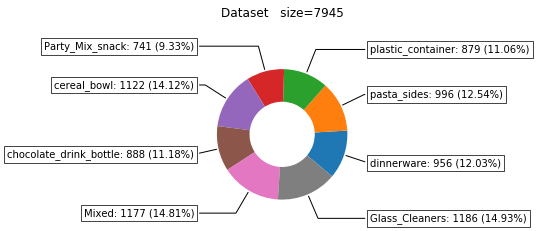

In [10]:
analysis(src_dataset, 'Dataset')

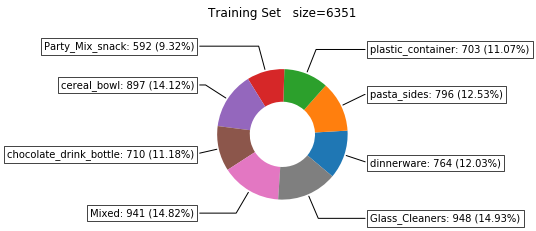

In [11]:
analysis(train, 'Training Set')

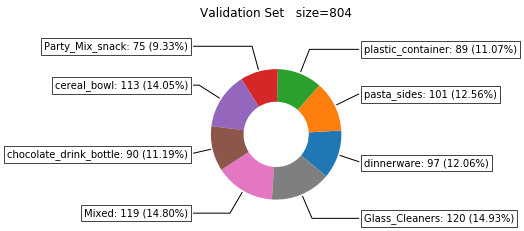

In [12]:
analysis(val, 'Validation Set')

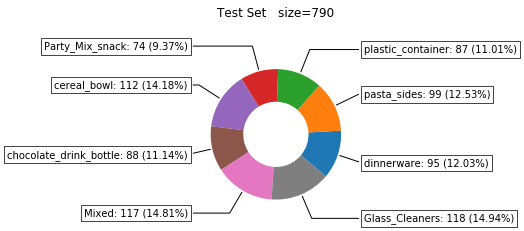

In [13]:
analysis(test, 'Test Set')